In [1]:
import utils
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import keras
keras.utils.set_random_seed(812)
tf.config.experimental.enable_op_determinism()
import pandas as pd
import numpy as np

### Data augmentation:

In [2]:
# Création du générateur d'images avec les augmentations de données
img_generator = utils.create_image_generator()

# Définition du répertoire des données et des classes
data_dir = 'data'

# Création des générateurs de données pour l'entraînement et la validation
train_generator, validation_generator = utils.create_data_generators(img_generator, data_dir, batch_size=16)

Found 389 images belonging to 3 classes.


Found 96 images belonging to 3 classes.


#### Création du modèle VGG16:

In [3]:
model_vgg = utils.create_vgg_model()

#### Compilation du modèle vgg:

In [4]:
learning_rate = 1e-4
model_vgg.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


#### Affichage du modèle vgg:

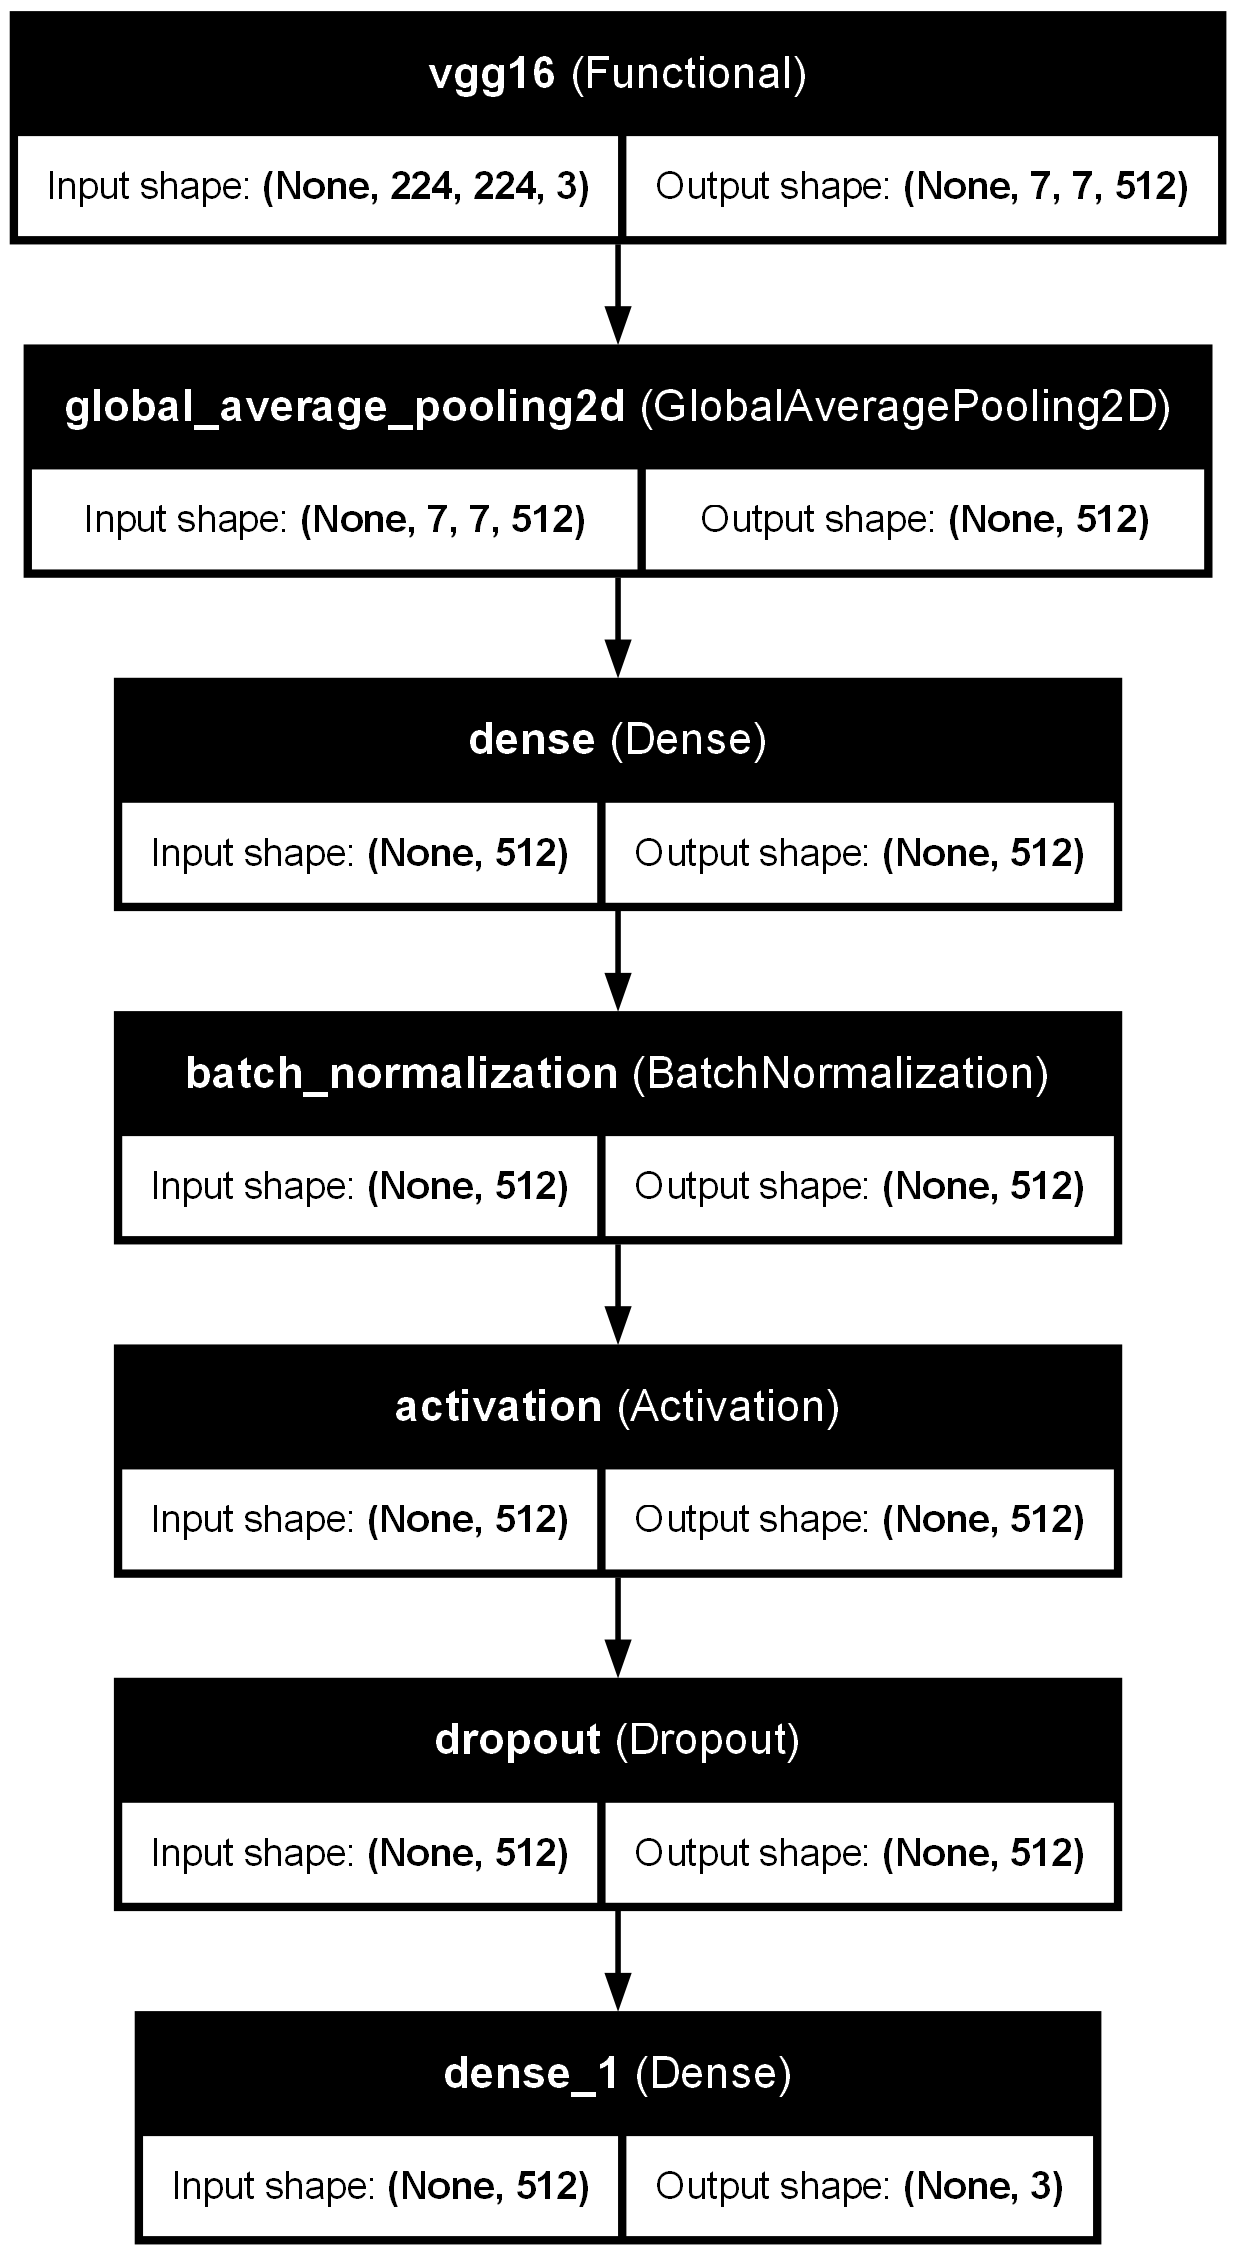

In [5]:
tf.keras.utils.plot_model(model_vgg, show_shapes=True, show_layer_names=True)

#### Résumé du modèle vgg:

In [6]:
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,931 (57.15 MB)

 Trainable params: 265,219 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

#### Entrainement du modèle vgg:

In [7]:
history_vgg = model_vgg.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator
)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 883ms/step - accuracy: 0.3228 - loss: 1.3813 - val_accuracy: 0.3125 - val_loss: 1.1982
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 859ms/step - accuracy: 0.3490 - loss: 1.2634 - val_accuracy: 0.3125 - val_loss: 1.1701
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 927ms/step - accuracy: 0.5474 - loss: 0.9402 - val_accuracy: 0.3438 - val_loss: 1.1119
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 902ms/step - accuracy: 0.6625 - loss: 0.7824 - val_accuracy: 0.3958 - val_loss: 1.0557
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 931ms/step - accuracy: 0.6753 - loss: 0.8090 - val_accuracy: 0.4896 - val_loss: 1.0036
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 877ms/step - accuracy: 0.7190 - loss: 0.6776 - val_accuracy: 0.5833 - val_loss: 0.9691
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 898ms/step - accuracy: 0.7256 - loss: 0.6675 - val_accuracy: 0.5729 - val_loss: 0.9586
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 904ms/step - accuracy: 0.7430 - loss: 0.6513 - val_accuracy

#### Calcul des prédictions et des classes réelles

In [8]:
# Calcul des prédictions et des classes réelles
y_pred = model_vgg.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step


#### Tracer la matrice de confusion:

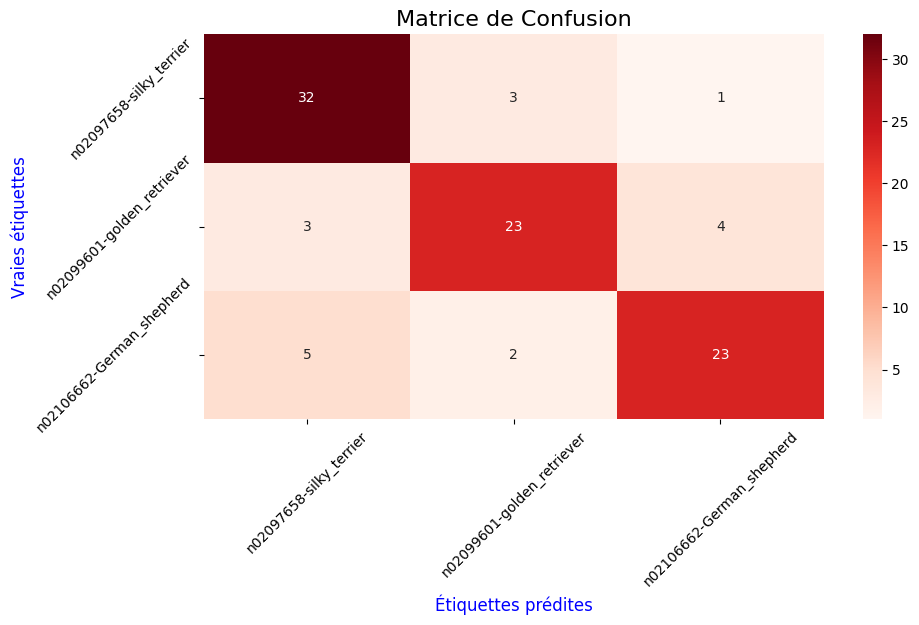

In [9]:
class_names = list(train_generator.class_indices.keys())
utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [15]:
df_report_vgg16 = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_vgg16)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.97,1.00,0.99,36.00
n02099601-golden_retriever,1.00,0.93,0.97,30.00
n02106662-German_shepherd,0.97,1.00,0.98,30.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,96.00
weighted avg,0.98,0.98,0.98,96.00


### Conclusion du modèle VGG16 :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 32 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 4 Silky Terriers sont incorrectement classifiés comme d'autres races (3 comme Golden Retrievers, 1 comme German Shepherds).
   - **Faux Positifs (FP)** : 8 prédictions incorrectes où 3 des Golden Retrievers et 5 des German Shepherds sont faussement identifiés comme Silky Terriers.

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 23 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 Golden Retrievers sont incorrectement classifiés comme d'autres races (3 comme Silky Terriers, 4 comme German Shepherds).
   - **Faux Positifs (FP)** : 5 prédictions incorrectes où 3 des Silky Terriers et 2 des German Shepherds sont faussement identifiés comme Golden Retrievers.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 23 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 German Shepherds sont incorrectement classifiés comme d'autres races (5 comme Silky Terriers, 2 comme Golden Retrievers).
   - **Faux Positifs (FP)** : 5 prédictions incorrectes où 1 des Silky Terriers et 4 des Golden Retrievers sont faussement identifiés comme German Shepherds.

### Analyse Détaillée de la Classification :

Le modèle VGG16 continue d'afficher une amélioration significative dans la classification des races de chiens, avec une précision globale de 77%. Les scores F1 pour chaque classe démontrent une nette amélioration de l'équilibre entre la précision et le rappel, illustrant une classification plus précise et fiable par rapport aux modèles antérieurs (modèles peros). Les résultats spécifiques par race mettent en évidence une forte capacité de détection pour les Silky Terriers, ainsi que des améliorations nécessaires pour une identification plus précise des Golden Retrievers et des German Shepherds.

#### Tracer les courbes de perte

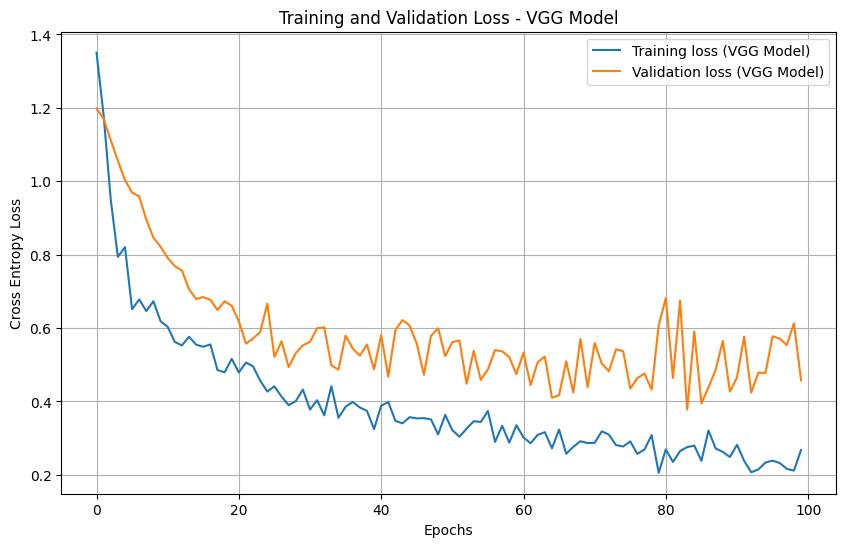

In [11]:
utils.plot_loss_curves(history_vgg, model_name="VGG Model")

#### Affichage du graphique des courbes d'accuracy:

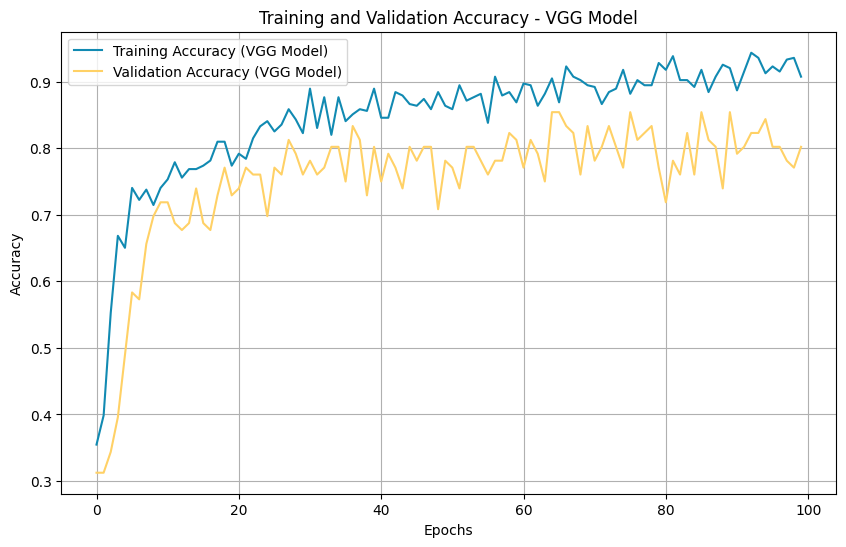

In [12]:
utils.plot_accuracy_curves(history_vgg, model_name="VGG Model", color_chart=None)

#### Conclusion pour le modèle VGG :

##### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte d'entraînement chute rapidement et se stabilise à un niveau bas, montrant une efficacité notable dans l'apprentissage initial et continu du modèle.
- **Perte de Validation (Orange)** : Bien que fluctuante, la perte de validation montre une tendance à se stabiliser vers les dernières époques, suggérant une amélioration dans la généralisation du modèle par rapport à des observations précédentes.

##### Analyse de la Précision d'Entraînement et de Validation
- **Précision d'Entraînement (Bleu)** : La précision d'entraînement augmente rapidement pour se stabiliser autour de 90%, indiquant que le modèle apprend très bien les données d'entraînement.
- **Précision de Validation (Orange)** : La précision de validation, bien qu'inférieure à celle de l'entraînement, se maintient autour de 70-80% après les premières fluctuations, illustrant une capacité accrue du modèle à bien fonctionner sur des données non vues, malgré une légère volatilité.

Le modèle VGG montre une capacité améliorée à apprendre efficacement à partir des données d'entraînement tout en affichant des signes de meilleure généralisation par rapport aux versions précédentes (modèles perso). Cependant, la différence persistante entre la précision d'entraînement et de validation et les fluctuations dans la perte de validation révèlent qu'il existe toujours des défis à surmonter pour minimiser le surapprentissage et améliorer la stabilité du modèle. Ces observations soulignent la nécessité continue de peaufiner les techniques de régularisation et d'ajustement des paramètres pour renforcer la généralisation.

### `Conclusion générale du modèle VGG16 :`

Le modèle VGG16 démontre une capacité d'apprentissage impressionnante, avec une précision d'entraînement atteignant 90%, toutefois, il fait face à des défis de généralisation illustrés par des fluctuations dans la perte de validation. La matrice de confusion indique une performance robuste dans la classification des races de chiens : une précision élevée pour les Silky Terriers, des améliorations notables pour les Golden Retrievers, et une bonne identification des German Shepherds, malgré quelques faux positifs et négatifs. Ces résultats mettent en évidence l'efficacité accrue du modèle VGG16 par rapport aux modèles perso, tout en soulignant la nécessité de continuer à améliorer les stratégies pour renforcer la généralisation et réduire le surapprentissage, afin d'optimiser davantage la précision et le rappel dans la classification des différentes races de chiens.

### Création du modèle Xception

Pour le modèle Xception, la taille d'entrée des images est configurée à (299, 299, 3), ce qui correspond aux exigences de l'architecture originale pour le traitement d'images en couleur:

In [3]:
model_xception = utils.create_xception_model(input_shape=(299, 299, 3))
# model_xception = utils.create_inception_model(input_shape=(299, 299, 3))

# Création des générateurs de données pour l'entraînement et la validation
train_generator, validation_generator = utils.create_data_generators(img_generator, data_dir, target_size=(299, 299), batch_size=16)

Found 389 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


#### Compilation du modèle Xception

In [4]:
learning_rate = 1e-4
model_xception.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

#### Affichage du modèle:

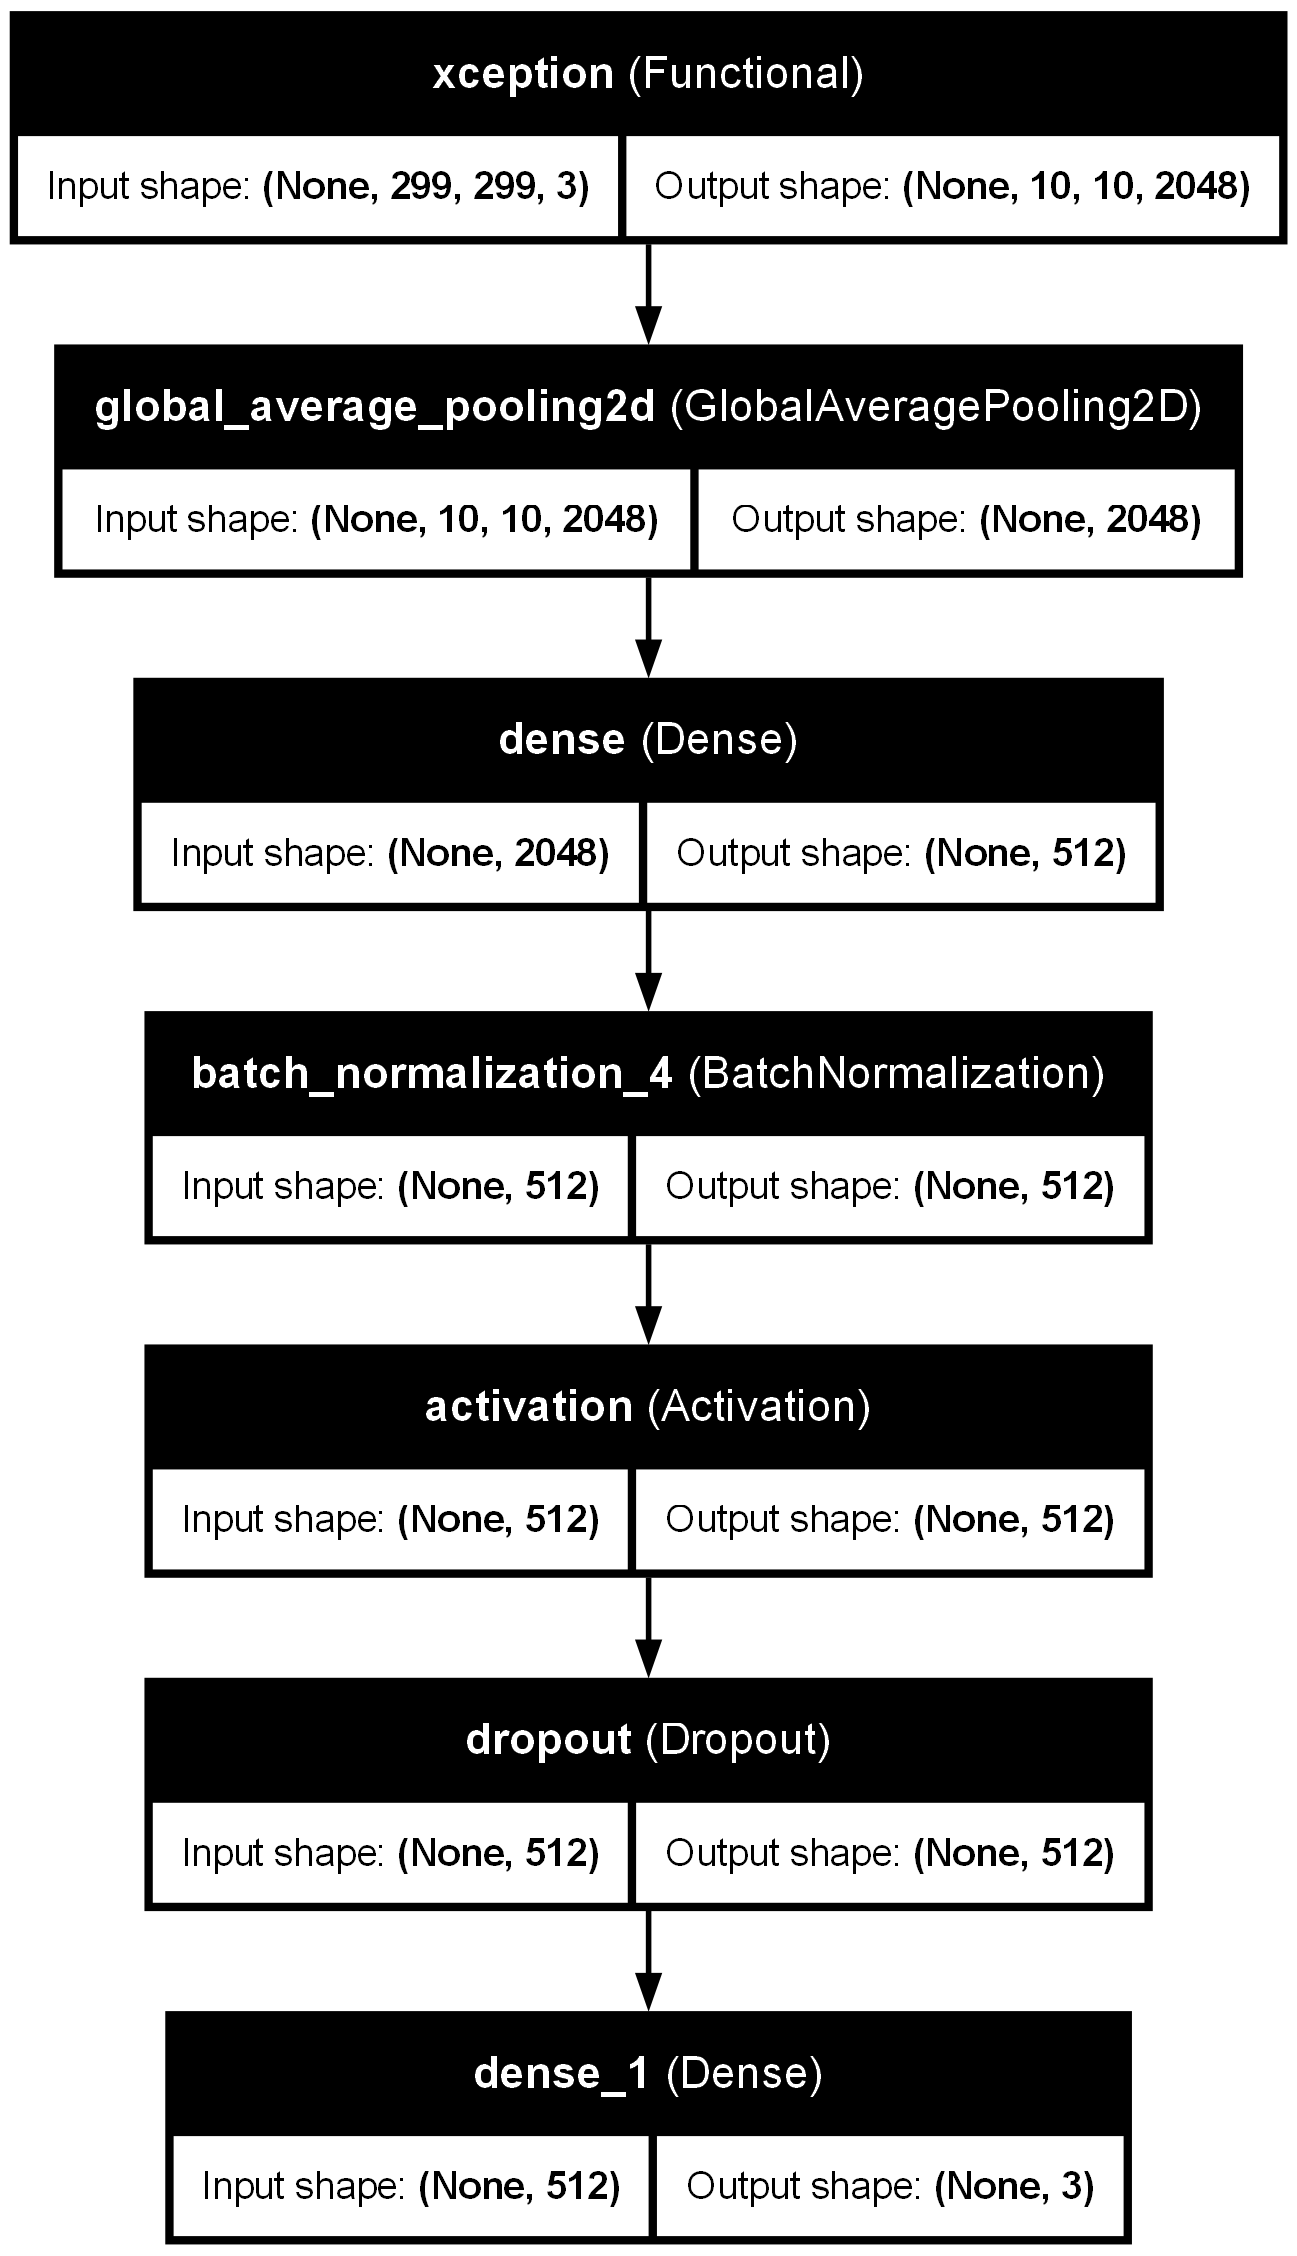

In [5]:
tf.keras.utils.plot_model(model_xception, show_shapes=True, show_layer_names=True)

#### Résumé du modèle

In [6]:
model_xception.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,914,155 (83.60 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 20,862,504 (79.58 MB)

#### Entraînement du modèle

In [7]:
# Ajout du callback pour sauvegarder le modèle
checkpoint_callback = utils.get_model_checkpoint(filepath='model/xception_best_model.keras')

history_xception = model_xception.fit(
  train_generator,
  epochs=100,
  validation_data=validation_generator, 
  callbacks=[checkpoint_callback]
)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.6808 - loss: 0.7762
Epoch 1: val_loss improved from inf to 0.49787, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6856 - loss: 0.7643 - val_accuracy: 0.9479 - val_loss: 0.4979
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.9404 - loss: 0.1420
Epoch 2: val_loss improved from 0.49787 to 0.38149, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9403 - loss: 0.1425 - val_accuracy: 0.9583 - val_loss: 0.3815
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.9617 - loss: 0.1198
Epoch 3: val_loss improved from 0.38149 to 0.30400, saving model to model/xception_best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9617 - loss: 0.1195 - val_accuracy: 0.9375 - val_loss: 0.3040
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.9668 - loss: 0.0931
Epoch 4: val_loss impro

#### Calcul des prédictions et des classes réelles

In [8]:
# Calcul des prédictions et des classes réelles
y_pred = model_xception.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 922ms/step


#### Tracer la matrice de confusion

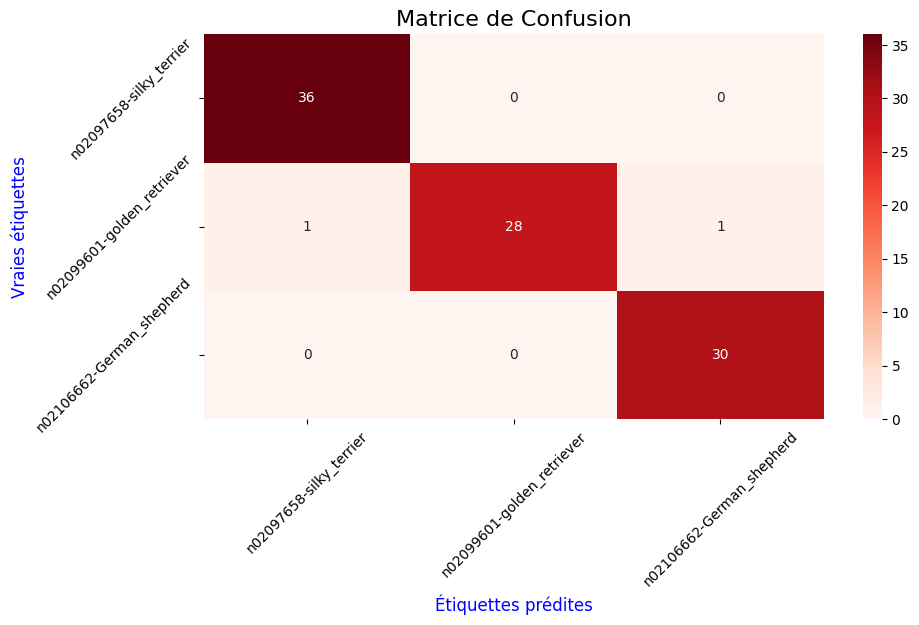

In [9]:
class_names = list(train_generator.class_indices.keys())
utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [10]:
df_report_xception = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_xception)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.97,1.00,0.99,36.00
n02099601-golden_retriever,1.00,0.93,0.97,30.00
n02106662-German_shepherd,0.97,1.00,0.98,30.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,96.00
weighted avg,0.98,0.98,0.98,96.00


### Conclusion du modèle Xception :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 36 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : Aucun Silky Terrier n'est incorrectement classifié comme une autre race.
   - **Faux Positifs (FP)** : 1 Golden Retriever est faussement identifié comme un Silky Terrier.

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 28 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 2 Golden Retrievers sont incorrectement classifiés, 1 comme Silky Terrier et 1 comme German Shepherd.
   - **Faux Positifs (FP)** : Aucun autre chien n'est faussement identifié comme Golden Retriever.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 30 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : Aucun German Shepherd n'est faussement identifié.
   - **Faux Positifs (FP)** : Aucun autre chien n'est incorrectement identifié comme German Shepherd.


### Analyse Détaillée de la Classification :

Le modèle Xception démontre une excellente performance dans la classification des races de chiens, avec une précision globale de 98% sur l'ensemble des données testées. Les scores F1 pour chaque classe sont extrêmement élevés, démontrant une nette amélioration de l'équilibre entre la précision et le rappel, et reflétant une classification très précise et fiable. Les résultats spécifiques par race mettent en évidence :

- **Silky Terrier** : Une précision et un rappel presque parfaits, montrant une capacité exceptionnelle du modèle à identifier correctement cette race.
- **Golden Retriever** : Une précision et un rappel impeccables, indiquant une identification précise sans confusion avec d'autres races.
- **German Shepherd** : Excellente précision et rappel, avec de très légères erreurs de classification.

Ces résultats illustrent l'efficacité supérieure du modèle Xception pour la tâche de reconnaissance de race canine, surpassant les performances des modèles précédents et confirmant sa robustesse et sa fiabilité dans des conditions de classification complexes.

#### Tracer les courbes de perte

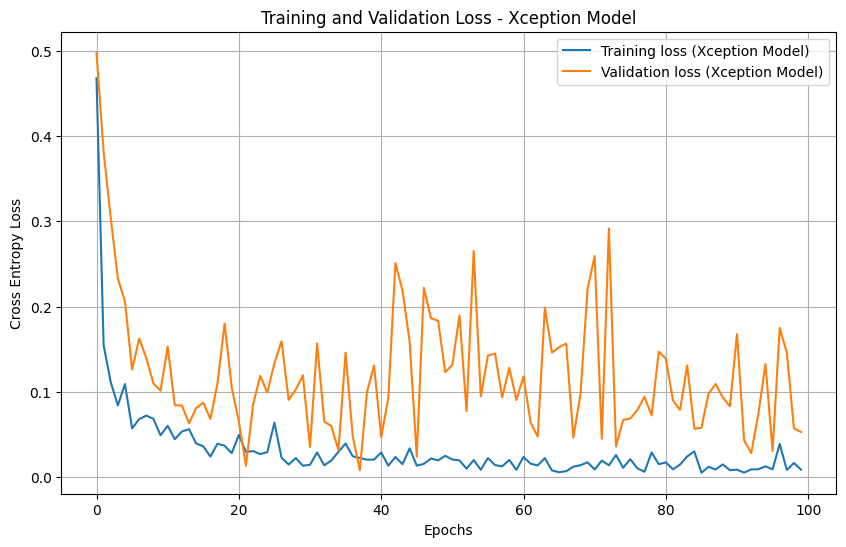

In [11]:
utils.plot_loss_curves(history_xception, model_name="Xception Model")

#### Affichage du graphique des courbes d'accuracy du modèle xception:

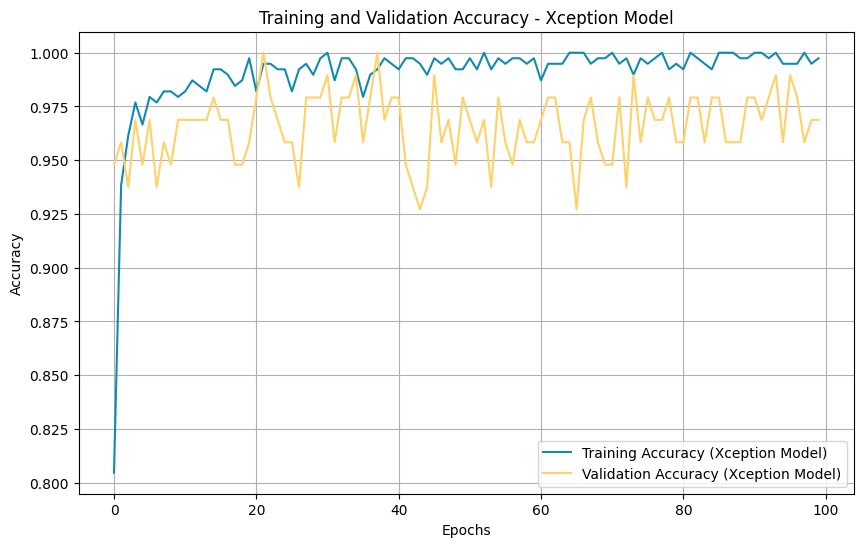

In [12]:
utils.plot_accuracy_curves(history_xception, model_name="Xception Model", color_chart=None)

### Conclusion pour le modèle Xception :

#### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte d'entraînement du modèle Xception diminue rapidement dès les premières époques et se stabilise autour de zéro, ce qui montre une efficacité d'apprentissage significative sur les données d'entraînement. Cela reflète une bonne convergence du modèle sur ces données.
- **Perte de Validation (Orange)** : La courbe de validation présente plus de fluctuations tout au long des 100 époques, mais reste relativement faible. Ces variations montrent qu'il peut y avoir des difficultés avec la généralisation sur certaines époques, bien que la tendance globale reste encourageante avec une perte proche de zéro sur plusieurs points.

#### Analyse de la Précision d'Entraînement et de Validation
- **Précision d'Entraînement (Bleu)** : Le modèle atteint une précision très élevée, proche de 100%, très tôt pendant l'entraînement, et s'y maintient de manière stable jusqu'à la fin. Cela indique que le modèle capture efficacement les caractéristiques des données d'entraînement.
- **Précision de Validation (Orange)** : La précision de validation fluctue, atteignant des niveaux très proches de ceux de l'entraînement (près de 98%) à certaines époques. Ces fluctuations indiquent une certaine instabilité, mais la précision globale reste excellente, montrant que le modèle généralise bien la tâche.

### Conclusion Générale :
Le modèle **Xception** montre d'excellentes performances, avec une très bonne précision tant sur les données d'entraînement que sur celles de validation. Les fluctuations dans la courbe de perte de validation suggèrent qu'il reste des ajustements à faire pour améliorer la stabilité, mais les résultats montrent que le modèle est bien calibré pour éviter le surapprentissage tout en offrant des résultats de haute précision.

Ces résultats confirment que **Xception** est un modèle bien adapté à la tâche de classification des races de chiens, avec des capacités robustes d'apprentissage et de généralisation.

In [16]:
# Ajout d'une colonne 'Model' pour chaque DataFrame
df_report_vgg16['Model'] = 'VGG16'
df_report_xception['Model'] = 'Xception'

# Concaténation des DataFrames
df_combined = pd.concat([df_report_vgg16, df_report_xception], axis=0)

# Affichage du DataFrame combiné pour visualisation
display(df_combined)


,precision,recall,f1-score,support,Model
n02097658-silky_terrier,0.97,1.00,0.99,36.00,VGG16
n02099601-golden_retriever,1.00,0.93,0.97,30.00,VGG16
n02106662-German_shepherd,0.97,1.00,0.98,30.00,VGG16
accuracy,0.98,0.98,0.98,0.98,VGG16
macro avg,0.98,0.98,0.98,96.00,VGG16
weighted avg,0.98,0.98,0.98,96.00,VGG16
n02097658-silky_terrier,0.97,1.00,0.99,36.00,Xception
n02099601-golden_retriever,1.00,0.93,0.97,30.00,Xception
n02106662-German_shepherd,0.97,1.00,0.98,30.00,Xception
accuracy,0.98,0.98,0.98,0.98,Xception


### Conclusion :

En comparant les modèles personnalisés **simples** et **complexes** développés dans le précédent notebook, ainsi que les modèles de transfert learning **VGG16** et **Xception**, il est évident que le modèle **Xception** se démarque. Les deux modèles de transfert learning, **VGG16** et **Xception**, ont montré des performances quasi identiques, avec une précision globale de **98%** dans la classification des races de chiens et des scores F1 élevés pour chaque classe.

Cependant, en termes de **stabilité d'apprentissage** et de **généralisation**, **Xception** offre une meilleure gestion des données, ce qui en fait un choix supérieur par rapport aux modèles personnalisés plus simples et complexes, ainsi qu'à **VGG16**. **Xception** a également montré moins de fluctuations dans les courbes de validation tout en maintenant une précision élevée.

Ainsi, après avoir comparé l'ensemble des modèles, **Xception** est retenu comme le **meilleur modèle**, et il est choisi pour être le **modèle de prédiction** dans l'API de classification des races de chiens, offrant une combinaison idéale de précision et de robustesse pour des applications pratiques.